<a href="https://colab.research.google.com/github/Patelsandesh998/A-BASIC-TO-DO-WEBAPP/blob/main/Speech_Emotion_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Modules**

In [107]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

**Load the Dataset**

In [60]:
paths = []
labels = []
for dirname, _, filenames in os.walk('//content/drive/MyDrive/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))

        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
         break
print('Dataset is Loaded')

Dataset is Loaded


In [61]:
len(paths)

3070

In [62]:
paths[:5]

['//content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_ton_fear.wav',
 '//content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_haze_fear.wav',
 '//content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_time_fear.wav',
 '//content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_love_fear.wav',
 '//content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_fear/YAF_talk_fear.wav']

In [63]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [64]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,//content/drive/MyDrive/TESS Toronto emotional...,fear
1,//content/drive/MyDrive/TESS Toronto emotional...,fear
2,//content/drive/MyDrive/TESS Toronto emotional...,fear
3,//content/drive/MyDrive/TESS Toronto emotional...,fear
4,//content/drive/MyDrive/TESS Toronto emotional...,fear


In [65]:
df['label'].value_counts()

,count
label,
neutral,600
sad,470
fear,400
disgust,400
ps,400
angry,400
happy,400


**Exploratory Data Analysis**

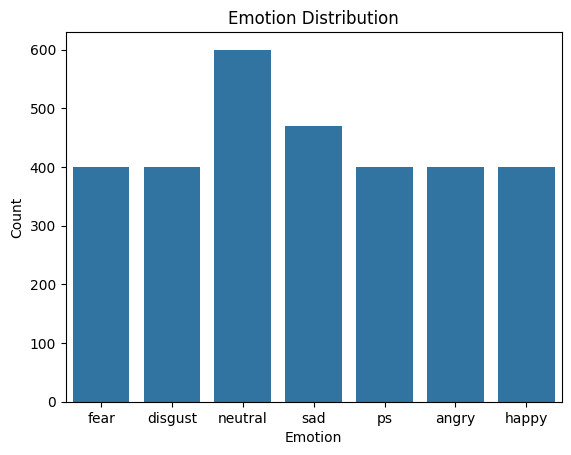

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correct way
sns.countplot(x='label', data=df)

plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

In [67]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)

    plt.show()

def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

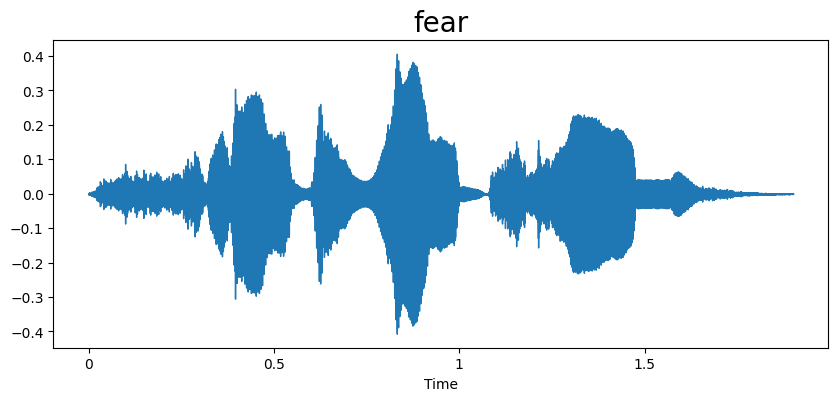

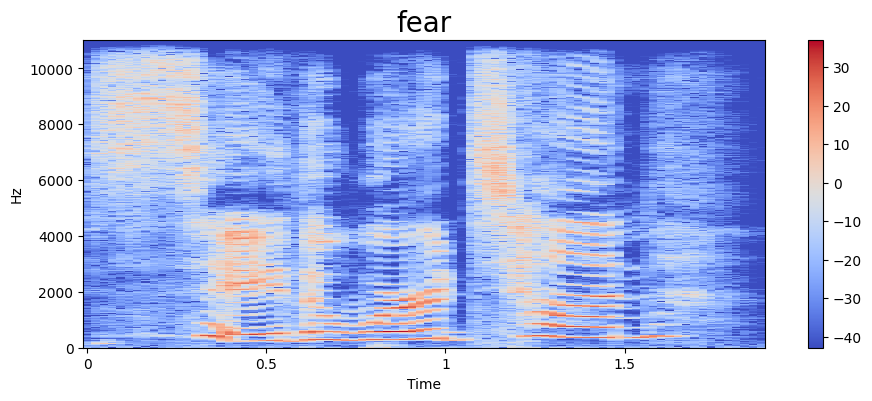

In [68]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

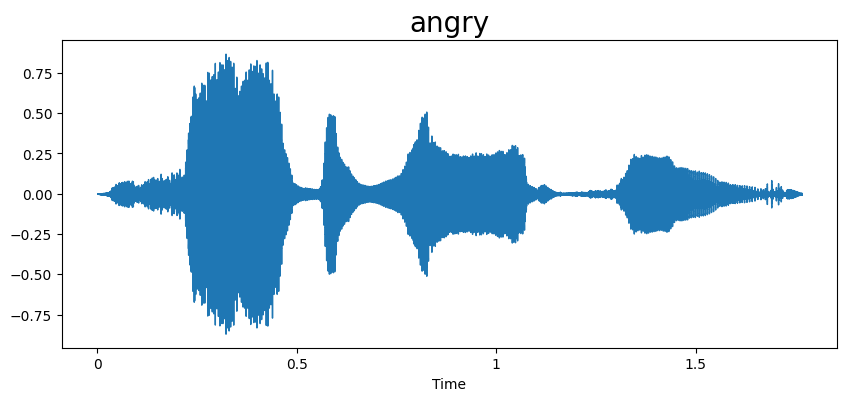

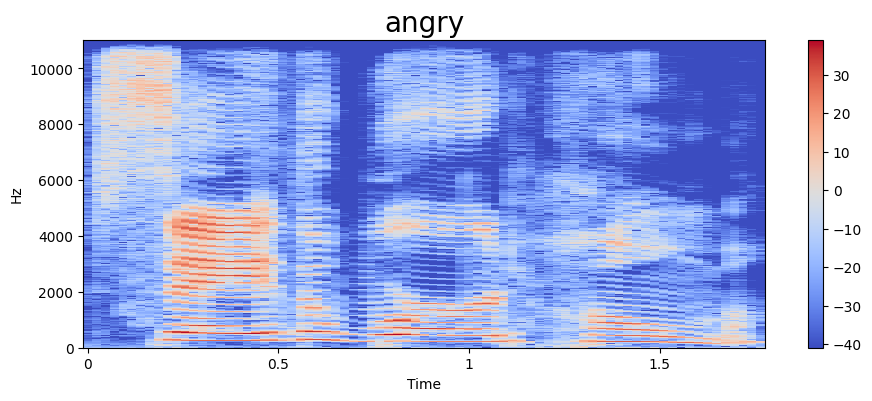

In [69]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

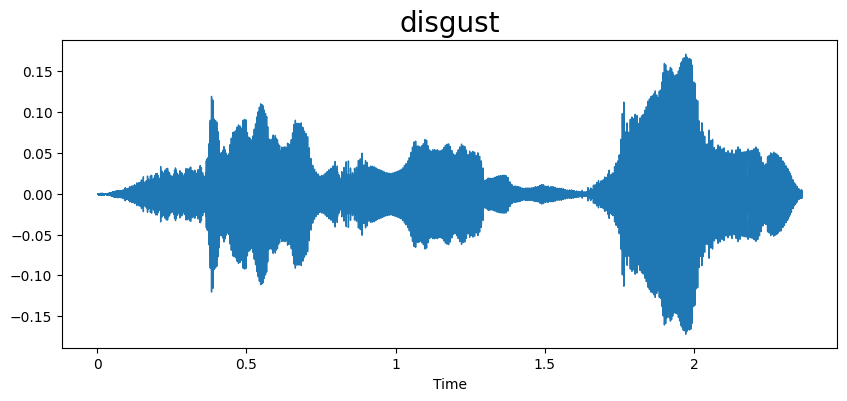

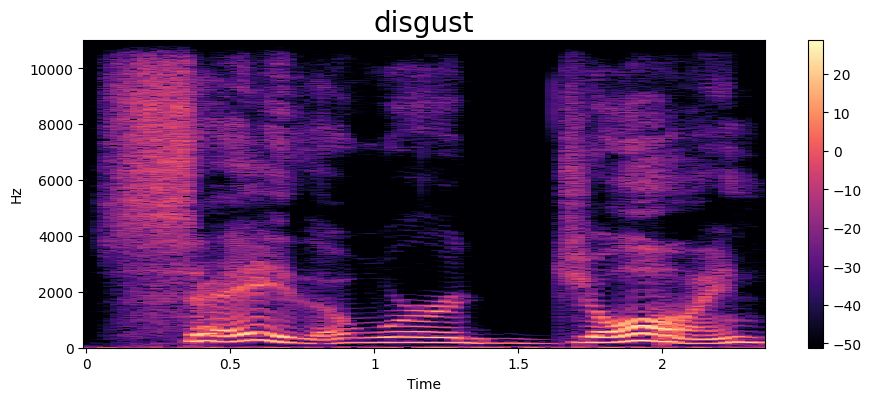

In [70]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

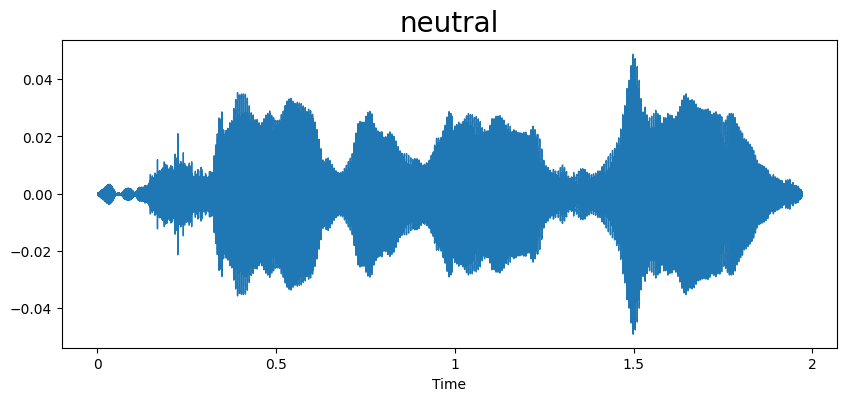

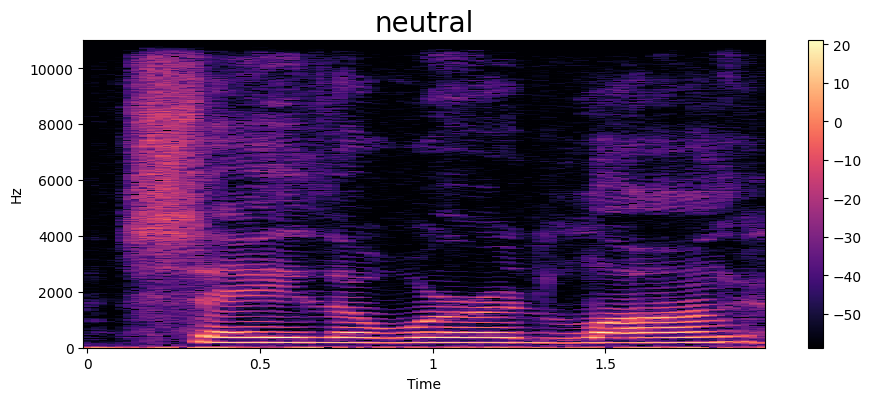

In [71]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

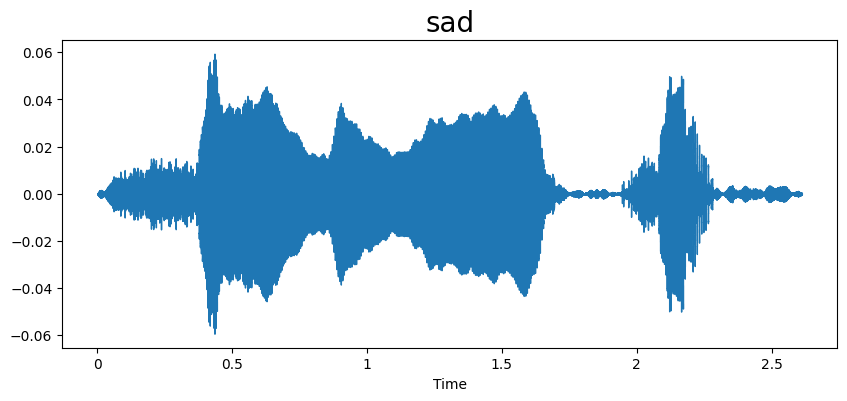

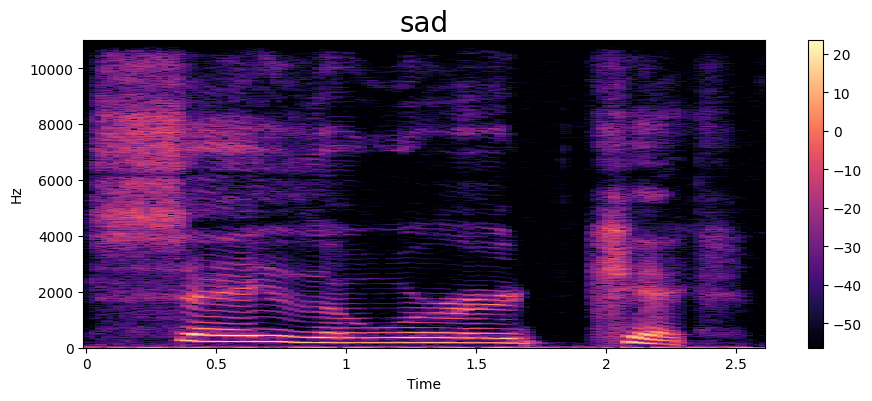

In [72]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

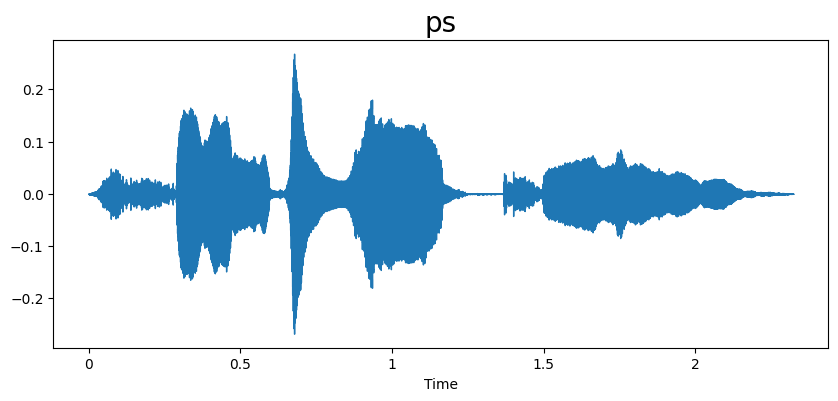

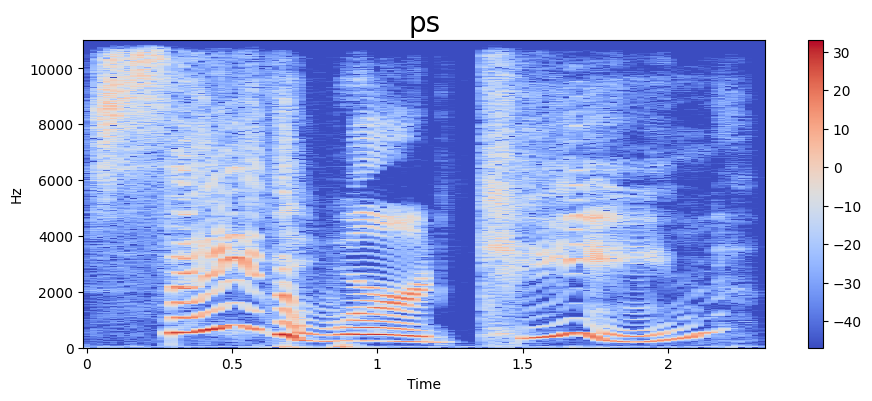

In [73]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

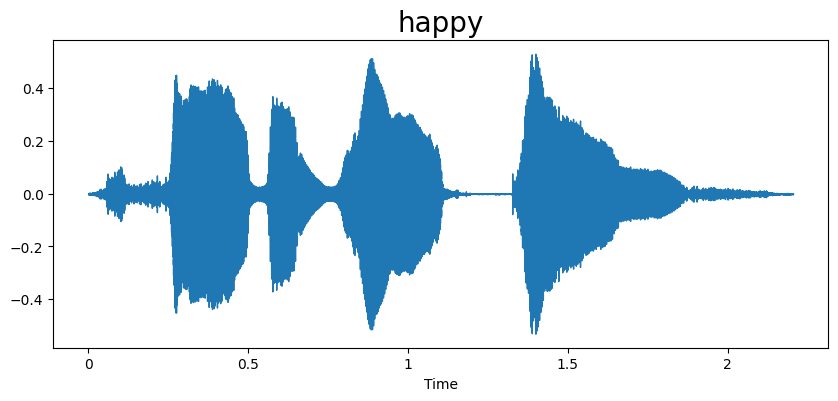

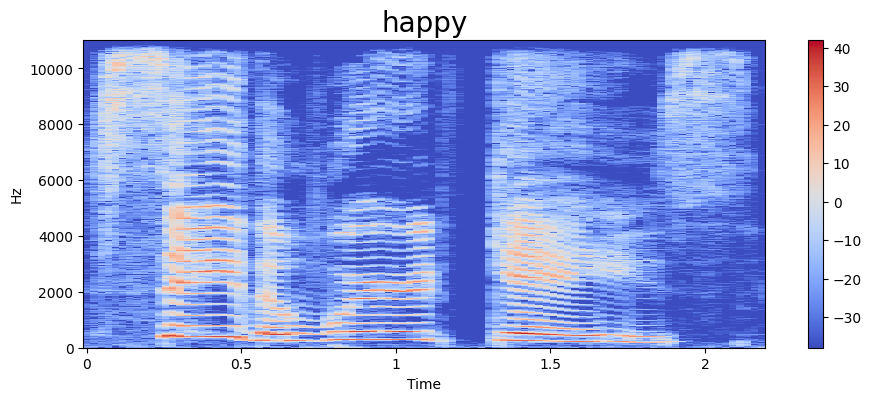

In [74]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [75]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [76]:
extract_mfcc(df['speech'][0])

array([-3.1362830e+02,  4.1857273e+01, -2.6031006e+01,  5.7021470e+00,
       -8.9571304e+00, -8.0695158e-01, -5.3018875e+00, -1.4769225e+01,
       -9.8084288e+00,  9.0622206e+00, -2.2664049e+01,  7.6664722e-01,
       -3.2225227e+00, -1.1739247e+00,  3.1785734e+00, -3.1175270e+00,
        3.6627448e+00,  1.6082783e+01, -4.7356176e-01,  7.9055057e+00,
        2.2050459e+00, -1.7565022e+00,  4.8555708e+00,  8.3764772e+00,
        9.6430511e+00,  1.5659359e+01, -3.4351649e+00,  8.0439252e-01,
       -5.8839741e+00,  1.5070698e+00, -2.7919035e+00,  4.2843917e-01,
       -4.1720796e+00,  1.5069319e-01, -2.6799583e-01,  5.2401056e+00,
       -9.0387177e-01,  4.0064301e+00, -6.9557512e-01,  1.9506382e+00],
      dtype=float32)

In [77]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [78]:
X_mfcc

,speech
0,"[-313.6283, 41.857273, -26.031006, 5.702147, -..."
1,"[-303.1025, 28.919565, -16.35579, 24.388657, -..."
2,"[-333.81586, 40.91223, -19.692923, 13.061709, ..."
3,"[-269.5171, 56.21758, -12.811468, -4.1020637, ..."
4,"[-312.49847, 43.69597, -27.160572, 5.971699, -..."
...,...
3065,"[-458.95798, 82.24331, 3.5631053, 34.137707, -..."
3066,"[-400.03897, 75.106285, 9.106214, 15.347229, -..."
3067,"[-417.25916, 113.828964, 3.9064553, 21.789845,..."
3068,"[-455.23358, 98.44896, 6.681035, 25.266926, -3..."


In [79]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(3070, 40)

In [80]:
X = np.expand_dims(X, -1)
X.shape

(3070, 40, 1)

In [81]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [82]:
y = y.toarray()

In [83]:
y.shape

(3070, 7)

**Create the LSTM Model**

In [98]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [101]:
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, validation_split=0.2, epochs=15, batch_size=64)

Epoch 1/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.9984 - loss: 0.0084 - val_accuracy: 0.3974 - val_loss: 6.3576
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.9946 - loss: 0.0167 - val_accuracy: 0.4397 - val_loss: 5.6555
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.9970 - loss: 0.0066 - val_accuracy: 0.4251 - val_loss: 5.8698
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.9999 - loss: 0.0032 - val_accuracy: 0.3583 - val_loss: 6.3018
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.3160 - val_loss: 6.8045
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.2769 - val_loss: 7.4836
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9999 - loss: 0.0021 - val_accuracy: 0.2720 - val_loss: 7.2471
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.9990 - loss: 0.0027 - val_accuracy: 0.

**Plot the results**

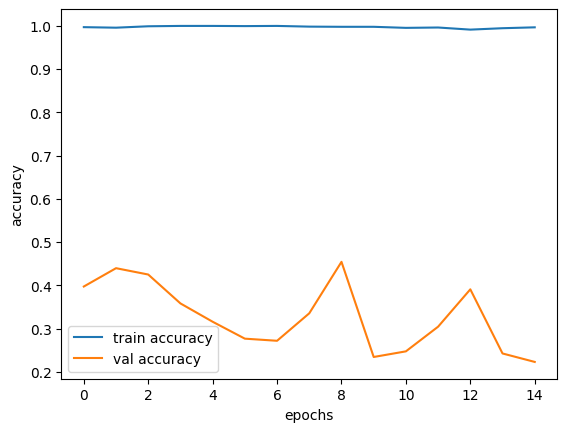

In [105]:
epochs = list(range(15))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

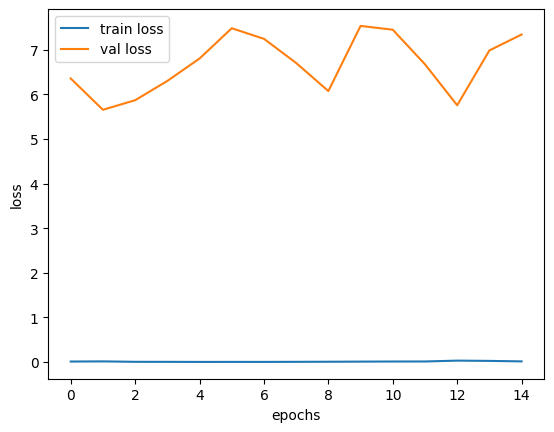

In [106]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()